# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


# Loading dataset

In [2]:
df = pd.read_csv(R'titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#checking datatypes of all columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#Fetching column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#checking the presence of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking statistical analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

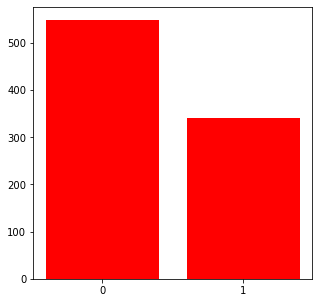

In [39]:
plt.figure(figsize=(5,5))
plt.bar(['0','1'],list(df['Survived'].value_counts()),color = 'r')
plt.show()

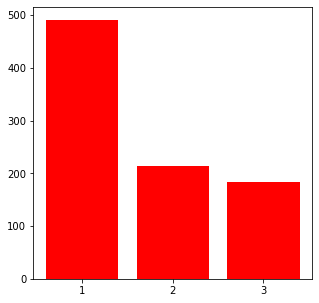

In [40]:
plt.figure(figsize=(5,5))
plt.bar(['1','2','3'],list(df['Pclass'].value_counts()),color = 'r')
plt.show()

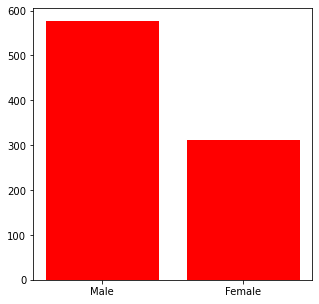

In [37]:
plt.figure(figsize=(5,5))
plt.bar(['Male','Female'],list(df['Sex'].value_counts()),color = 'r')
plt.show()

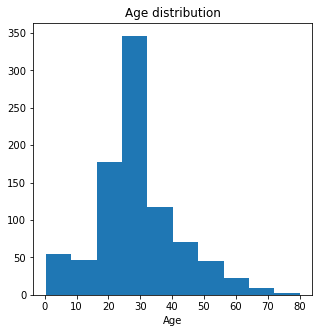

In [36]:
plt.figure(figsize=(5,5))
plt.hist(df['Age'])
plt.title('Age distribution')
plt.xlabel("Age")
plt.show()

In [11]:
#Checking correlation
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

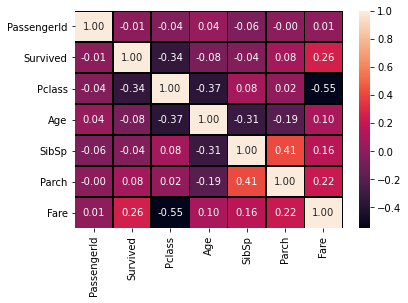

In [12]:
sns.heatmap(df.corr(), annot = True, linewidths =0.5, linecolor ="black", fmt = ".2f")

In [13]:
#Find no. of null value in Age column
sum(df['Age'].isnull())

177

In [14]:
#Filling null values with mean of Age column
df['Age'].fillna(value=df["Age"].mean(), inplace=True)

In [15]:
#Again checking no. of null value in Age column
sum(df['Age'].isnull())

0

Out of above columns only Age column has null value so we will fill all the null value with mean of age column

In [16]:
#Dropping cabin and ticket column as this is not correlated with target column and have lots of null values
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


converting the categorical data (Sex and Embarked) into numeric data.

In [18]:
df['Sex'].replace(['male', 'female'],[0, 1], inplace=True)
df['Embarked'].replace(['C','Q','S'],[0, 1,2], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,2.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,0.0


Now we can safely drop the Name and PassengerId feature from dataset as we do not need them.

In [19]:
df.shape

(891, 10)

In [20]:
df = df.drop(['Name', 'PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,2.0
1,1,1,1,38.000000,1,0,71.2833,0.0
2,1,3,1,26.000000,0,0,7.9250,2.0
3,1,1,1,35.000000,1,0,53.1000,2.0
4,0,3,0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,2.0
887,1,1,1,19.000000,0,0,30.0000,2.0
888,0,3,1,29.699118,1,2,23.4500,2.0
889,1,1,0,26.000000,0,0,30.0000,0.0


In [21]:
df.shape

(891, 8)

In [22]:
df =df.dropna()


In [23]:
#dividing data into x (input) and y (target) variables
x=df.iloc[:,:-1]# independent variables
y=df.iloc[:,-1]#target

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=90, test_size=0.20)

# Model train, predict

In [25]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


72.15

In [27]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

73.84

In [28]:
# KNeighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

86.78

In [29]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

50.91

In [30]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.72

In [31]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.72

# Model Evaluation

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [33]:
#Saving the model
import pickle
file_name = "churn.pkl"
pickle.dump(random_forest,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(x_test,y_test)
print(result*100)
conclusion =pd.DataFrame([loaded_model.predict(x_test)[:],Y_pred[:]],index = ["Predicted","Original"])
conclusion

80.33707865168539


,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
Predicted,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Original,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
